# Trabajo Práctico 2 - Machine Learning
$Felicitas Marolda$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib

## Parte 1: Diagnóstico de Cancer de Mama
El conjunto de datos de este problema fue generado a partir de imágenes histopatológicas de biopsias mamarias. Se extrajeron variables morfológicas y moleculares de las células, incluyendo tamaño, forma, densidad nuclear, tasa de mitosis y presencia de mutaciones. El objetivo es predecir el diagnóstico del tumor (benigno o maligno). Para una descripción más detallada del conjunto de datos, consulte cell_diagnosis_description.md. 

In [13]:
import sys
sys.path.append('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src')  # Reemplaza con la ruta real
import models as mod
import metrics as met
import preprocessing as pp

In [19]:
cell_diagnosis_dev_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev_imbalanced.csv')
cell_diagnosis_dev = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev.csv')
cell_diagnosis_test_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test_imbalanced.csv')
cell_diagnosis_test = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test.csv')

### Ejercicio 1.1
Realizar un análisis exploratorio de los datos para visualizar la distribución de las variables e identificar valores faltantes, outliers y variables categóricas. Investigar los rangos posibles de cada feature y analizar su correlación con el target.

      CellSize  CellShape  NucleusDensity  ChromatinTexture  CytoplasmSize  \
426  65.593112        NaN             NaN         19.613831      24.674269   
56   66.532082   0.508831        1.466605               NaN      25.384264   
782  70.280606   0.484965        1.456774         21.563168      26.220713   
650  69.567304   0.518560        1.498530         21.988891            NaN   
48   68.199843   0.485501        1.480497               NaN      27.542566   

     CellAdhesion  MitosisRate  NuclearMembrane  GrowthFactor  \
426      0.449985     3.688026         2.537382     59.876617   
56            NaN     3.390915         2.531480     56.293345   
782      0.470650     3.173334         2.367647     55.908850   
650           NaN     3.365166         2.476872     57.308615   
48       0.476276     3.266040         2.474918           NaN   

     OxygenSaturation  Vascularization  InflammationMarkers  Diagnosis  \
426         81.072781         5.398389            50.093138       

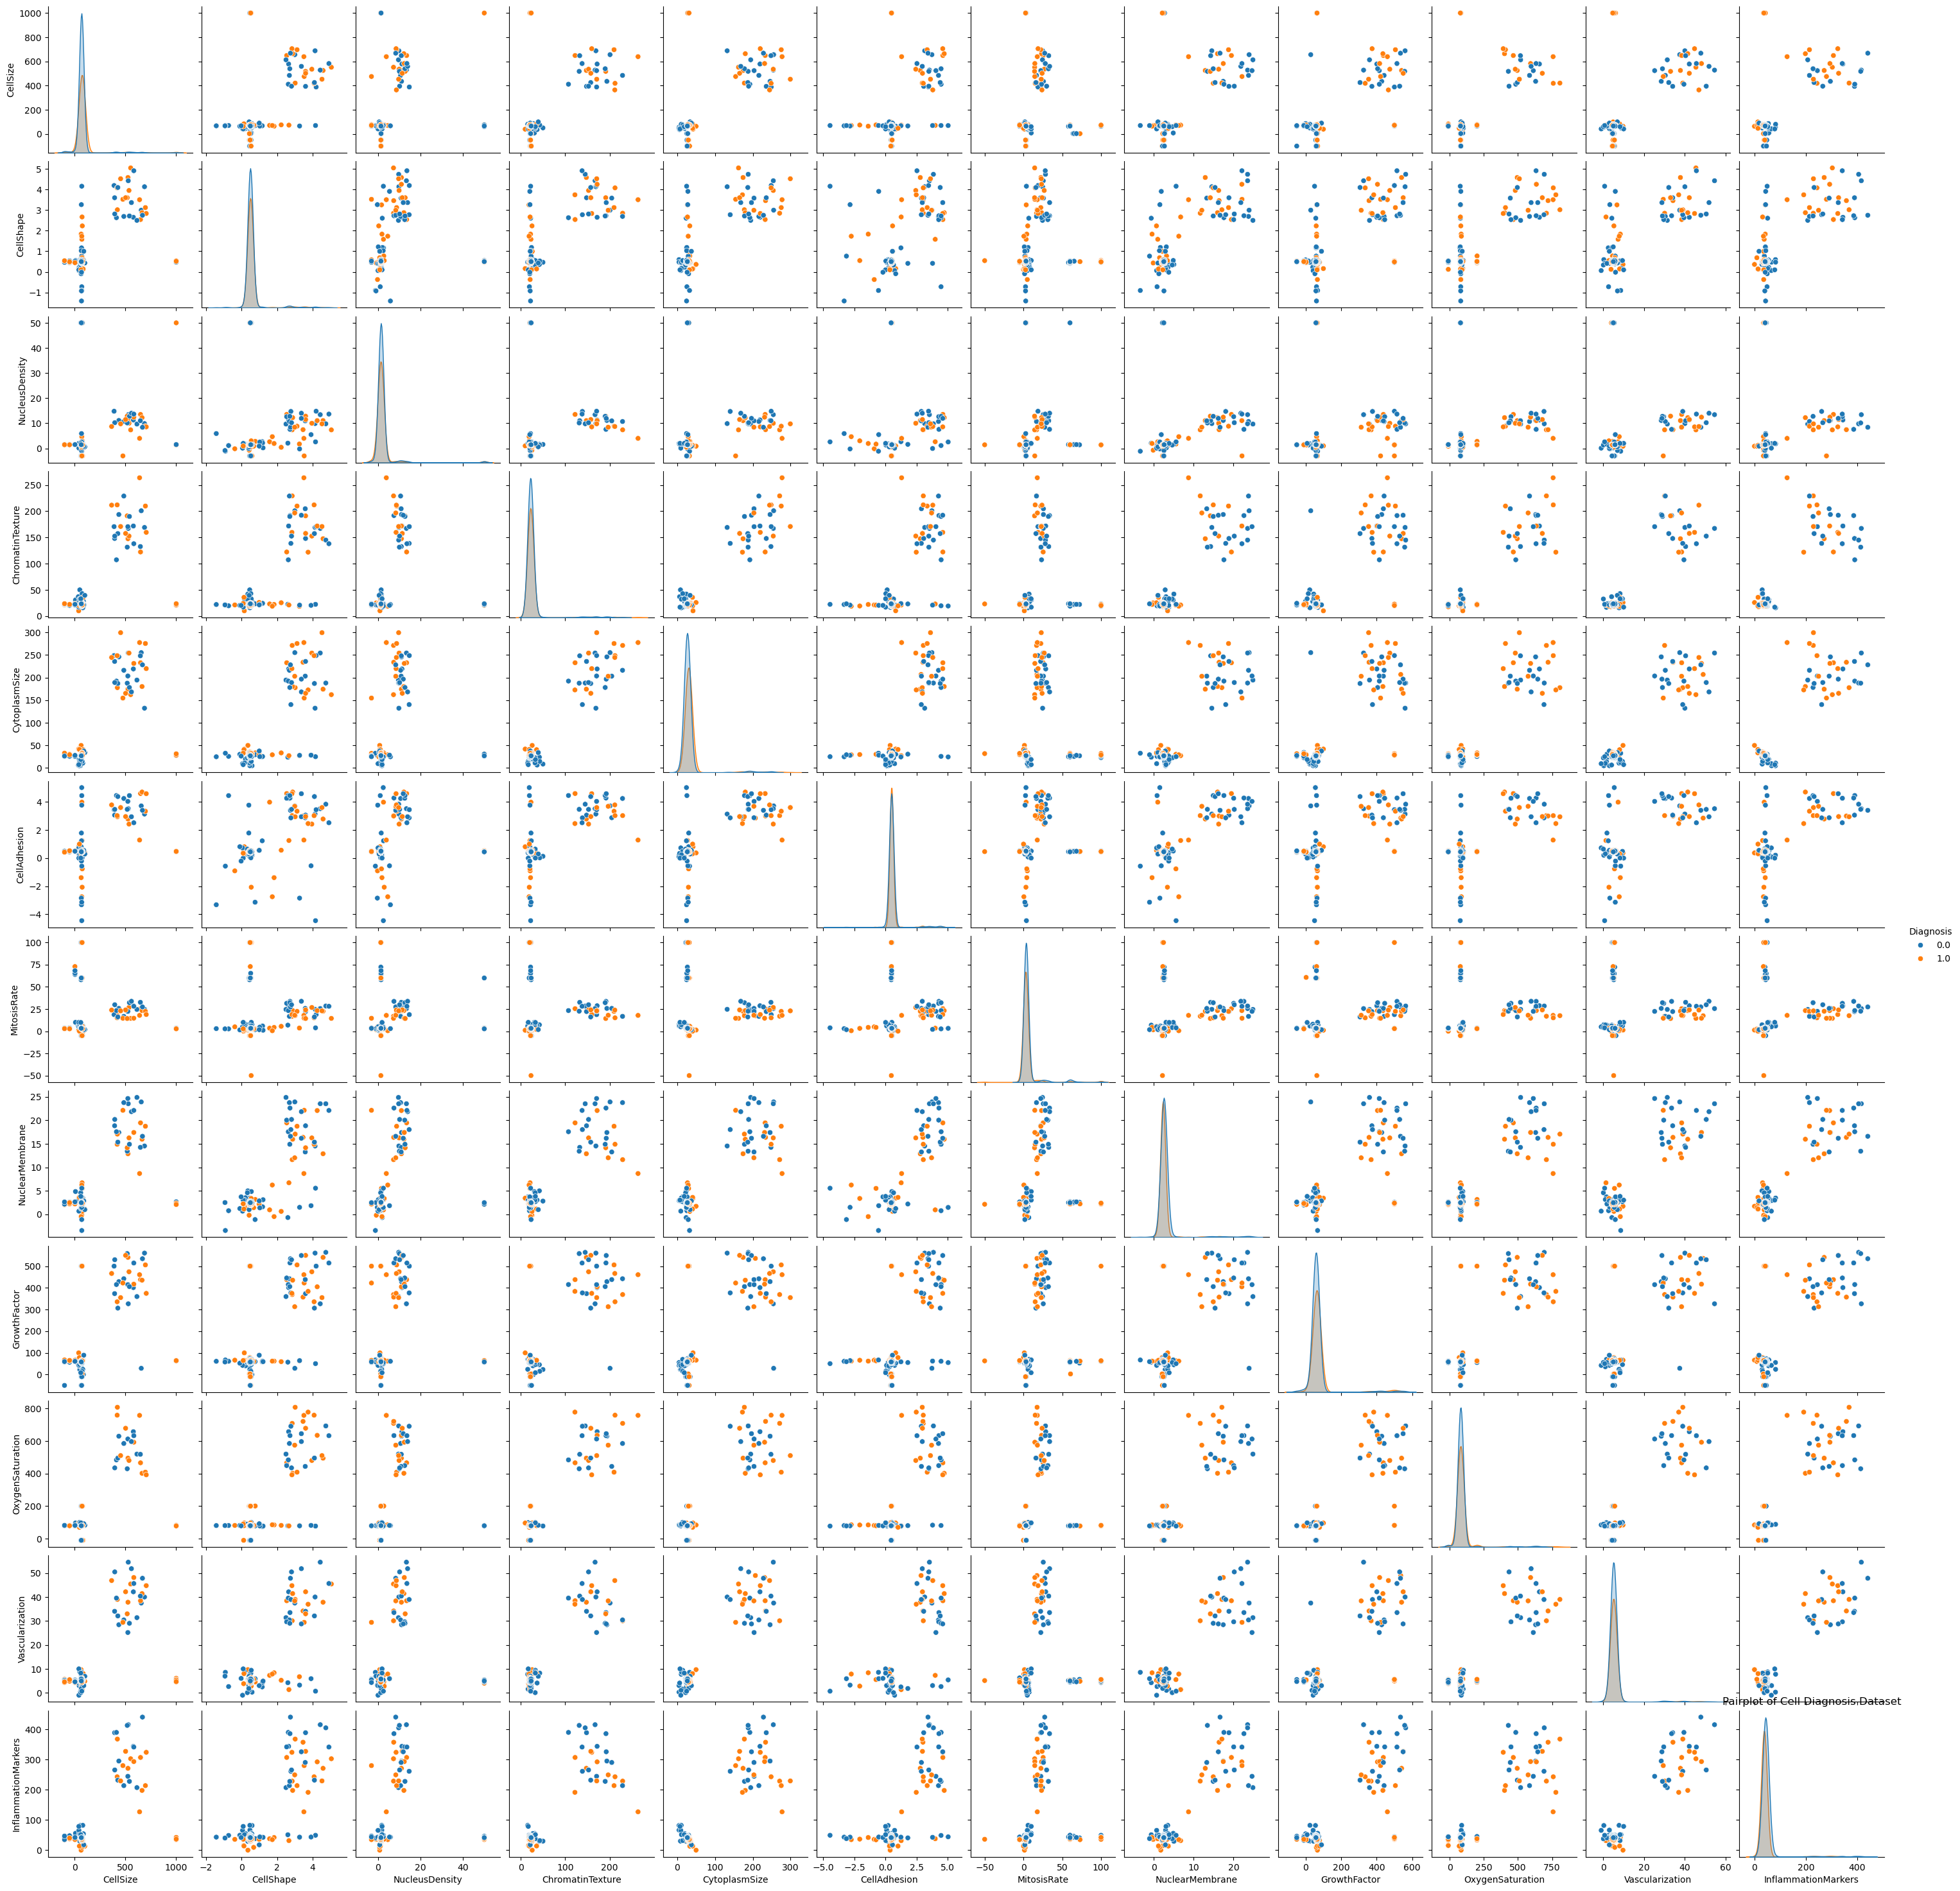

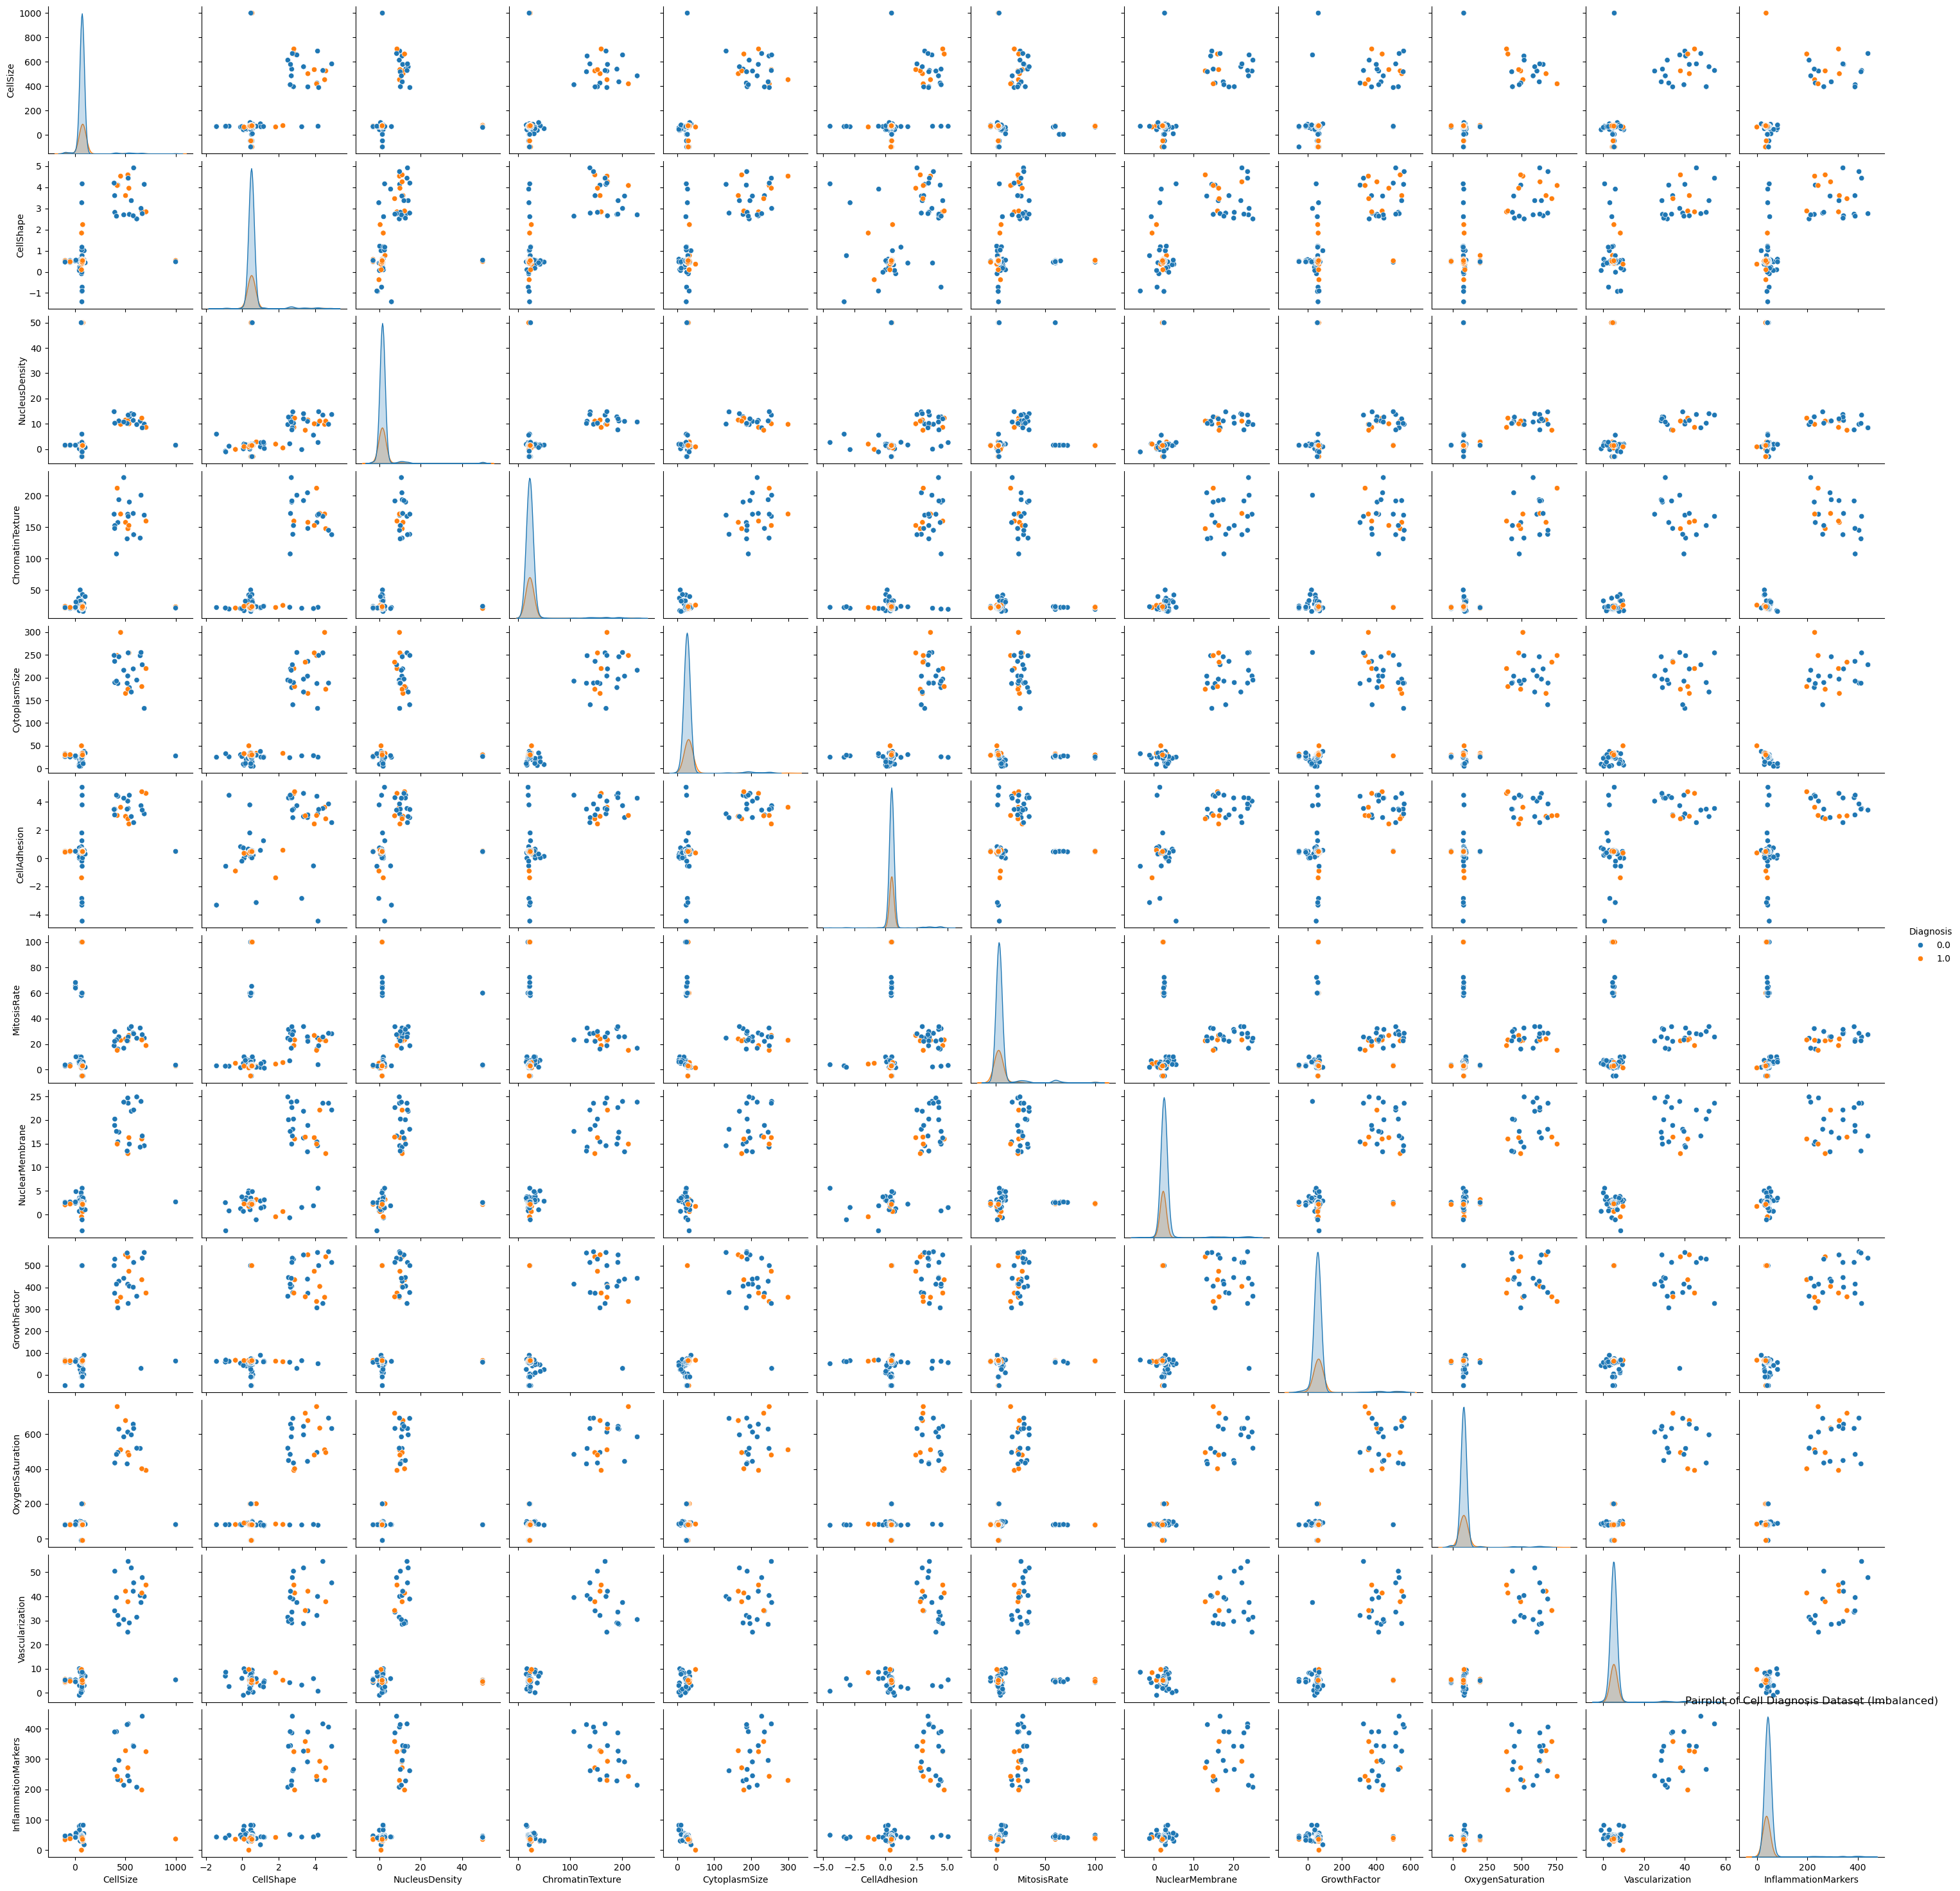

In [24]:
# imprimimos una muestra de los datos
print(cell_diagnosis_dev_imbalanced.sample(5))
print("-"*50)
print(cell_diagnosis_dev.sample(5))

# hacemos un pairplot para ver la distribucion de los datos
sns.pairplot(cell_diagnosis_dev, hue='Diagnosis', palette='husl')  
plt.title('Pairplot of Cell Diagnosis Dataset')
plt.show()

sns.pairplot(cell_diagnosis_dev_imbalanced, hue='Diagnosis', palette='rocket')
plt.title('Pairplot of Cell Diagnosis Dataset (Imbalanced)')
plt.show()

In [ ]:
# sacamos los nan
cell_diagnosis_dev_imbalanced = cell_diagnosis_dev_imbalanced.dropna()
cell_diagnosis_dev = cell_diagnosis_dev.dropna()

